# IMC Data Notebook

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
from sklearn.datasets import make_regression

file_input_day2 = r"C:\Users\alber\Downloads\round-1-island-data-bottle\prices_round_1_day_-2.csv"
file_input_day1 = r"C:\Users\alber\Downloads\round-1-island-data-bottle\prices_round_1_day_-1.csv"
file_input_day0 = r"C:\Users\alber\Downloads\round-1-island-data-bottle\prices_round_1_day_0.csv"
data2 = pd.read_csv(file_input_day2, sep = ";")
data1 = pd.read_csv(file_input_day1, sep = ";")
data0 = pd.read_csv(file_input_day0, sep = ";")

starfruit_df2 = data2[data2["product"] == 'STARFRUIT'].copy()
starfruit_df1 = data1[data1["product"] == 'STARFRUIT'].copy()
starfruit_df0 = data0[data0["product"] == 'STARFRUIT'].copy()

In [91]:
rolling_window = 10
columns_to_train = ['prev_mid_price', 'mid_price_ma', 'volatility']

starfruit_df2.set_index('timestamp', inplace=True)
starfruit_df2['prev_mid_price'] = starfruit_df2['mid_price'].shift(1)
starfruit_df2['mid_price_ma'] = starfruit_df2['mid_price'].rolling(window=rolling_window).mean()
starfruit_df2['volatility'] = starfruit_df2['mid_price'].rolling(window=rolling_window).std()
starfruit_df2.fillna(0, inplace=True)

starfruit_df2

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,prev_mid_price,mid_price_ma,volatility
timestamp,,,,,,,,,,,,,,,,,,,
0,-2,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,26,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.00,0.000000
100,-2,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,0.0,0.0,0.0,0.0,5002.0,0.0,5000.0,0.00,0.000000
200,-2,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,31,0.0,0.0,0.0,0.0,5000.0,0.0,5002.0,0.00,0.000000
300,-2,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,27,0.0,0.0,0.0,0.0,4999.5,0.0,5000.0,0.00,0.000000
400,-2,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,20,0.0,0.0,0.0,0.0,4998.5,0.0,4999.5,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,-2,STARFRUIT,5041,2,5040.0,24.0,0.0,0.0,5047,26,0.0,0.0,0.0,0.0,5044.0,0.0,5044.0,5044.35,0.914391
999600,-2,STARFRUIT,5040,30,0.0,0.0,0.0,0.0,5047,30,0.0,0.0,0.0,0.0,5043.5,0.0,5044.0,5044.25,0.950146
999700,-2,STARFRUIT,5040,22,0.0,0.0,0.0,0.0,5047,22,0.0,0.0,0.0,0.0,5043.5,0.0,5043.5,5044.15,0.973253


In [125]:
starfruit_df = pd.concat([starfruit_df2, starfruit_df1, starfruit_df0])
starfruit_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
7,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0
9,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0


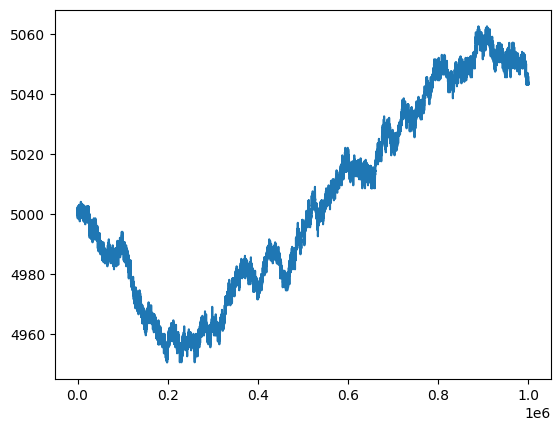

In [122]:
plt.plot(starfruit_df2['timestamp'], starfruit_df2['mid_price'])

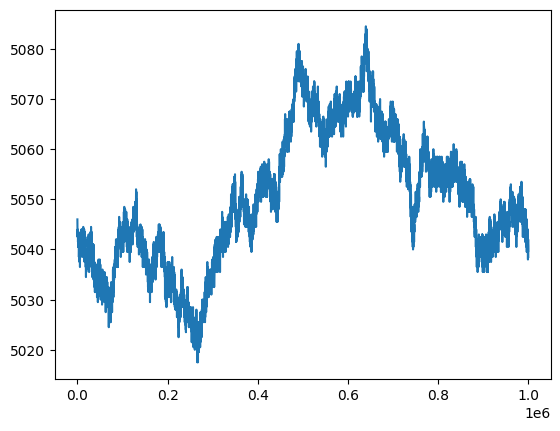

In [123]:
plt.plot(starfruit_df1['timestamp'], starfruit_df1['mid_price'])

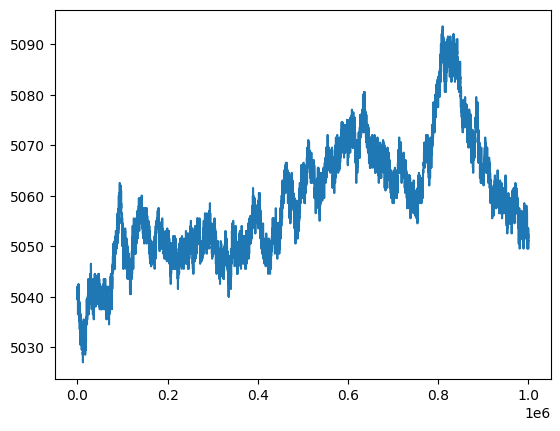

In [124]:
plt.plot(starfruit_df0['timestamp'], starfruit_df0['mid_price'])